<a href="https://colab.research.google.com/github/seonyong-kim/YOLO_Test/blob/main/YOLOTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. ultralytics 설치
!pip install ultralytics

# 2. 라이브러리 임포트
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

# 3. 모델 로드 (자동으로 다운로드됨)
model = YOLO("yolov8n.pt")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

100%|██████████| 6.25M/6.25M [00:00<00:00, 158MB/s]


Saving 다운로드.jpeg to 다운로드.jpeg

image 1/1 /content/다운로드.jpeg: 640x480 6 cars, 5 traffic lights, 189.4ms
Speed: 3.8ms preprocess, 189.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


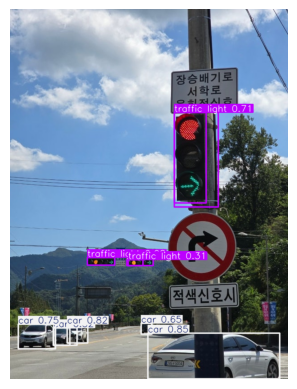

In [ ]:
# 4. 이미지 업로드
from google.colab import files
uploaded = files.upload()

# 예: 업로드한 이미지 이름이 example.jpg라고 가정
image_path = list(uploaded.keys())[0]

# 5. 이미지 감지 실행
results = model(image_path)

# 6. 결과 이미지 얻기
result_img = results[0].plot()

# 7. 이미지 출력 (matplotlib 사용)
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [2]:
import os

# 프로젝트 폴더 생성
project_name = "my_yolo_dataset"
base_path = f"/content/{project_name}"

# 학습용 이미지/라벨, 검증용 이미지/라벨 폴더 생성
folders = [
    "images/Car", "images/Bicycle",
    "images/Bus", "images/Kickboard",
    "images/Motorcycle",
    "labels/Car", "labels/Bicycle",
    "labels/Bus", "labels/Kickboard",
    "labels/Motorcycle"
]
for folder in folders:
    os.makedirs(os.path.join(base_path, folder), exist_ok=True)

print(f"폴더 생성 완료: {base_path}")


폴더 생성 완료: /content/my_yolo_dataset


In [7]:
# 사진 한꺼번에 올리기
from google.colab import files

uploaded = files.upload()


Saving train_data.zip to train_data.zip


In [6]:
import zipfile
import os

# 압축 해제 경로 설정
train_path = "/content/my_yolo_dataset/labels/train"
os.makedirs(train_path, exist_ok=True)

with zipfile.ZipFile("label_data.zip", "r") as zip_ref:
    zip_ref.extractall(train_path)

print("✅ 압축 해제 완료: train 이미지가 들어감")


✅ 압축 해제 완료: train 이미지가 들어감


In [8]:
import zipfile
import os

# 압축 해제 경로 설정
train_path = "/content/my_yolo_dataset/images/train"
os.makedirs(train_path, exist_ok=True)

with zipfile.ZipFile("train_data.zip", "r") as zip_ref:
    zip_ref.extractall(train_path)

print("✅ 압축 해제 완료: train 이미지가 들어감")

✅ 압축 해제 완료: train 이미지가 들어감


In [12]:
#yaml잘 되었는지 확인
!cat /content/my_yolo_dataset/data.yaml

train: /content/my_yolo_dataset/images/train
val: /content/my_yolo_dataset/images/val

nc: 5
names: ['car', 'bus', 'bicycle', 'Kickboard', 'Motorcycle']

In [11]:
from ultralytics import YOLO #학습하기

model = YOLO('yolov8n.pt')  # 또는 yolov8s.pt, yolov8m.pt 등
model.train(data='/content/my_yolo_dataset/data.yaml', epochs=50, imgsz=640)

Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/my_yolo_dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li

100%|██████████| 755k/755k [00:00<00:00, 91.2MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 326MB/s]


AMP: checks passed ✅


train: Scanning /content/my_yolo_dataset/labels/train... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<00:00, 1487.87it/s]

train: New cache created: /content/my_yolo_dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/my_yolo_dataset/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 19807.81it/s]

val: New cache created: /content/my_yolo_dataset/labels/val.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.05G     0.9165      3.442      1.487         21        640: 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all          4          4     0.0152          1      0.334      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/50      2.05G      0.832       3.35      1.413         25        640: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.71it/s]

                   all          4          4     0.0149          1      0.363      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.08G     0.9709      3.363      1.496         27        640: 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.70it/s]

                   all          4          4      0.016          1      0.364      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.1G     0.6667      3.298      1.271         24        640: 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.75it/s]

                   all          4          4     0.0186          1      0.409      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.12G     0.6667      3.154      1.269         24        640: 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.13it/s]

                   all          4          4       0.02          1      0.663      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.13G     0.6481       3.05      1.262         27        640: 100%|██████████| 2/2 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.43it/s]

                   all          4          4     0.0158          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.15G     0.6747      2.965      1.293         27        640: 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.05it/s]

                   all          4          4     0.0142          1      0.871      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.17G     0.6568      2.891      1.293         25        640: 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.69it/s]

                   all          4          4     0.0154          1      0.871      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.19G     0.5968      2.736      1.289         19        640: 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.29it/s]

                   all          4          4      0.014          1      0.871      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.21G     0.6085      2.586      1.295         24        640: 100%|██████████| 2/2 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.83it/s]

                   all          4          4     0.0133          1      0.871      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.22G     0.5959      2.456      1.179         24        640: 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]


                   all          4          4     0.0124          1      0.871      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.24G     0.5909      2.303      1.165         28        640: 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all          4          4     0.0126          1      0.871      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.26G     0.5214      2.235      1.126         30        640: 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]

                   all          4          4     0.0119          1      0.871      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.28G     0.5447      2.141      1.143         26        640: 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]

                   all          4          4     0.0119          1      0.871      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.29G     0.6578      1.945      1.305         22        640: 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]

                   all          4          4     0.0111          1      0.871      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.31G     0.5804      1.826      1.253         19        640: 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all          4          4      0.154          1      0.871      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.33G     0.6097      1.865      1.242         22        640: 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.09it/s]

                   all          4          4      0.742        0.5      0.995      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.34G     0.6018      1.826      1.208         27        640: 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.22it/s]

                   all          4          4      0.821        0.5      0.995      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.36G     0.6147      1.691      1.231         27        640: 100%|██████████| 2/2 [00:00<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.71it/s]

                   all          4          4      0.903       0.25      0.995      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.38G     0.6494      1.675      1.207         24        640: 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]

                   all          4          4      0.861       0.25      0.995      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.39G     0.6944       1.63      1.244         27        640: 100%|██████████| 2/2 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.91it/s]

                   all          4          4    0.00782          1      0.995      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.41G     0.6083      1.438      1.181         24        640: 100%|██████████| 2/2 [00:00<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.58it/s]

                   all          4          4      0.512          1      0.995      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.43G     0.5959      1.597      1.162         23        640: 100%|██████████| 2/2 [00:00<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]

                   all          4          4      0.885       0.25      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.45G     0.6101      1.371      1.184         30        640: 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]


                   all          4          4      0.896       0.25      0.995       0.92

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.46G     0.6808      1.534       1.33         24        640: 100%|██████████| 2/2 [00:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.44it/s]

                   all          4          4      0.824        0.5      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.48G     0.5283      1.274      1.126         23        640: 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]

                   all          4          4      0.687          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       2.5G     0.5109      1.266      1.112         28        640: 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all          4          4      0.602          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.52G     0.4992      1.201      1.135         26        640: 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.55it/s]

                   all          4          4      0.602          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.53G     0.5377      1.368      1.149         20        640: 100%|██████████| 2/2 [00:00<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all          4          4       0.65          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.55G     0.5048      1.261      1.119         23        640: 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]

                   all          4          4      0.699       0.75      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.57G     0.4758      1.126      1.109         28        640: 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.42it/s]

                   all          4          4      0.699       0.75      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.58G     0.5469      1.188      1.117         27        640: 100%|██████████| 2/2 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.64it/s]

                   all          4          4      0.709       0.75      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.61G     0.5249      1.148      1.111         24        640: 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]


                   all          4          4      0.693       0.75      0.995      0.871

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.62G     0.4915      1.203      1.121         20        640: 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.42it/s]

                   all          4          4      0.693       0.75      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.63G     0.4989      1.043       1.08         31        640: 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


                   all          4          4      0.698       0.75      0.995      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.66G     0.5568       1.26       1.16         25        640: 100%|██████████| 2/2 [00:00<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.15it/s]

                   all          4          4      0.632          1      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.68G     0.4568      1.087      1.092         25        640: 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.01it/s]

                   all          4          4      0.632          1      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.68G     0.5134      1.132      1.072         26        640: 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]

                   all          4          4      0.735          1      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.71G     0.4708      1.085      1.071         24        640: 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.50it/s]

                   all          4          4      0.805          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.73G     0.5862      1.225      1.204         19        640: 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.20it/s]


                   all          4          4      0.805          1      0.995      0.895
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.73G     0.4857      2.028      1.141          9        640: 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all          4          4      0.772          1      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.76G     0.4644      1.894      1.147          9        640: 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.06it/s]

                   all          4          4      0.632          1      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.78G     0.3797       1.77      1.025          9        640: 100%|██████████| 2/2 [00:00<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.86it/s]

                   all          4          4      0.632          1      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.79G     0.3558      1.745      1.026          9        640: 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.35it/s]

                   all          4          4      0.647          1      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.81G     0.4004      1.663      1.071          9        640: 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.77it/s]

                   all          4          4      0.647          1      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.83G     0.3778      1.837      1.047          9        640: 100%|██████████| 2/2 [00:00<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.35it/s]

                   all          4          4      0.606          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.85G      0.412      1.885      1.103          9        640: 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.63it/s]

                   all          4          4      0.606          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.86G     0.4076      1.737       1.13          9        640: 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.30it/s]

                   all          4          4      0.623          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.88G      0.354      1.689      1.081          9        640: 100%|██████████| 2/2 [00:00<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.37it/s]

                   all          4          4      0.623          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       2.9G      0.337      1.733      1.039          9        640: 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.05it/s]

                   all          4          4      0.644          1      0.995       0.92



50 epochs completed in 0.014 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.24it/s]


                   all          4          4      0.646          1      0.995      0.945
                   car          1          1      0.625          1      0.995      0.995
                   bus          1          1      0.608          1      0.995      0.895
               bicycle          1          1      0.757          1      0.995      0.895
            Motorcycle          1          1      0.595          1      0.995      0.995
Speed: 0.3ms preprocess, 3.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ce209483150>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [13]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train2/weights/best.pt')  # ← 이 경로 맞음!

In [14]:
# 사진 한꺼번에 올리기
from google.colab import files

uploaded = files.upload()

Saving test1.jpeg to test1.jpeg
Saving test2.jpeg to test2.jpeg
Saving test3.jpeg to test3.jpeg
Saving test4.jpeg to test4.jpeg
Saving test5.jpeg to test5.jpeg
Saving test6.jpeg to test6.jpeg


In [25]:
results = model.predict(source='/content/test_images', save=True, conf=0.04)


image 1/6 /content/test_images/test1.jpeg: 448x640 1 bus, 8.4ms
image 2/6 /content/test_images/test2.jpeg: 480x640 2 buss, 7.8ms
image 3/6 /content/test_images/test3.jpeg: 608x640 1 bicycle, 1 Kickboard, 8.0ms
image 4/6 /content/test_images/test4.jpeg: 640x640 1 bicycle, 8.0ms
image 5/6 /content/test_images/test5.jpeg: 448x640 2 cars, 7.2ms
image 6/6 /content/test_images/test6.jpeg: 640x480 1 Motorcycle, 7.1ms
Speed: 2.3ms preprocess, 7.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


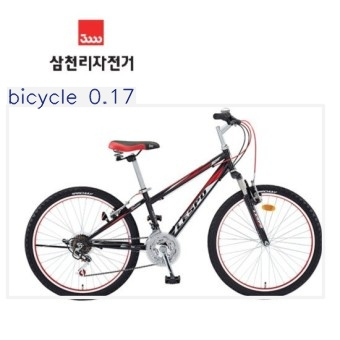

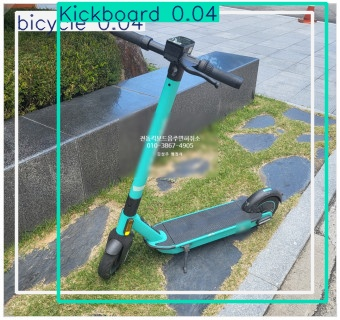

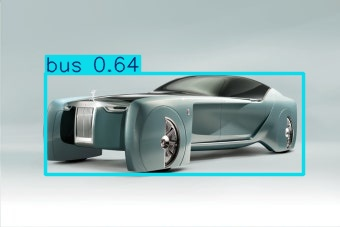

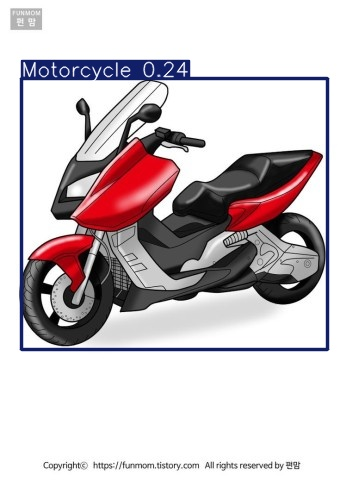

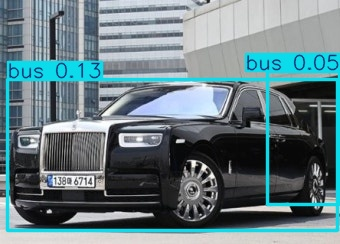

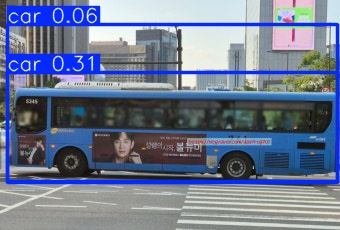

In [26]:
import glob
from IPython.display import Image, display

# 예측된 이미지 경로 리스트
predicted_images = glob.glob('/content/runs/detect/predict/*.jpg')

# 이미지 하나씩 출력
for img_path in predicted_images:
    display(Image(filename=img_path))